Encrypted Return Address: 4EBB4D4203F41174
Decrypted Return Address: 6B13E1094DAC1A71
Buffer overflow attack succeeded!


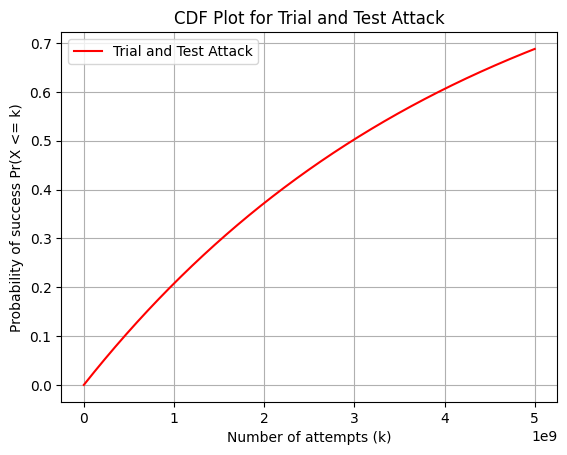

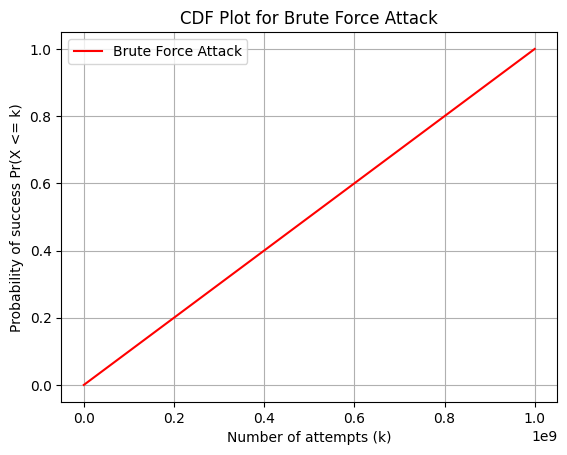

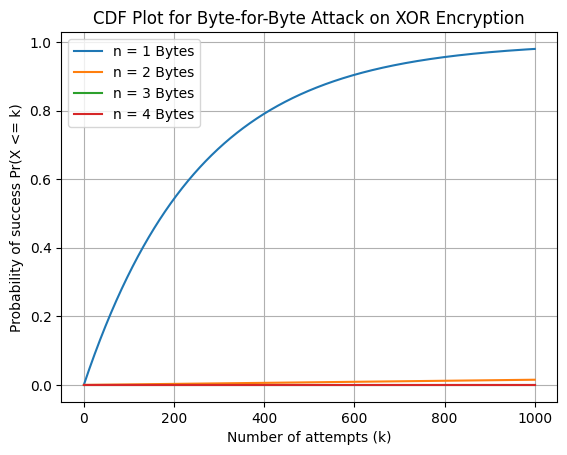

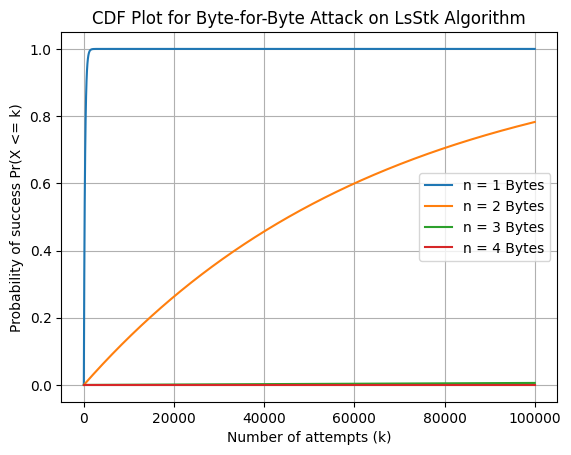

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Constants for RC5
RC5_WORD_SIZE = 32
RC5_ROUNDS = 12

# Simplified RC5 encryption and decryption functions
def rc5_key_schedule(key):
    return [key[i % len(key)] for i in range(2 * RC5_ROUNDS + 2)]

def rc5_encrypt(data, key):
    S = rc5_key_schedule(key)
    A = data & 0xFFFFFFFF
    B = (data >> 32) & 0xFFFFFFFF
    
    A = (A + S[0]) & 0xFFFFFFFF
    B = (B + S[1]) & 0xFFFFFFFF
    
    for i in range(1, RC5_ROUNDS + 1):
        A = (A ^ B) & 0xFFFFFFFF
        A = ((A << (B & (RC5_WORD_SIZE - 1))) | (A >> (RC5_WORD_SIZE - (B & (RC5_WORD_SIZE - 1))))) & 0xFFFFFFFF
        A = (A + S[2 * i]) & 0xFFFFFFFF
        B = (B ^ A) & 0xFFFFFFFF
        B = ((B << (A & (RC5_WORD_SIZE - 1))) | (B >> (RC5_WORD_SIZE - (A & (RC5_WORD_SIZE - 1))))) & 0xFFFFFFFF
        B = (B + S[2 * i + 1]) & 0xFFFFFFFF
        
    return (B << 32) | A

def rc5_decrypt(data, key):
    S = rc5_key_schedule(key)
    B = data & 0xFFFFFFFF
    A = (data >> 32) & 0xFFFFFFFF
    
    for i in range(RC5_ROUNDS, 0, -1):
        B = (B - S[2 * i + 1]) & 0xFFFFFFFF
        B = ((B >> (A & (RC5_WORD_SIZE - 1))) | (B << (RC5_WORD_SIZE - (A & (RC5_WORD_SIZE - 1))))) & 0xFFFFFFFF
        B = (B ^ A) & 0xFFFFFFFF
        A = (A - S[2 * i]) & 0xFFFFFFFF
        A = ((A >> (B & (RC5_WORD_SIZE - 1))) | (A << (RC5_WORD_SIZE - (B & (RC5_WORD_SIZE - 1))))) & 0xFFFFFFFF
        A = (A ^ B) & 0xFFFFFFFF
    
    B = (B - S[1]) & 0xFFFFFFFF
    A = (A - S[0]) & 0xFFFFFFFF
    
    return (A << 32) | B

# Simulate the stack with a function prologue and epilogue
def function_call_simulation(return_address, key1, key2):
    # Encrypt the return address in the prologue
    encrypted_return_address = rc5_encrypt(return_address, key1)
    print(f"Encrypted Return Address: {encrypted_return_address:X}")
    
    # Function body would go here (simulated by pass)
    pass
    
    # Decrypt the return address in the epilogue
    decrypted_return_address = rc5_decrypt(encrypted_return_address, key2)
    print(f"Decrypted Return Address: {decrypted_return_address:X}")
    
    return decrypted_return_address

# Buffer overflow simulation
def buffer_overflow_attack():
    return_address = 0xDEADBEEFDEADBEEF
    key1 = [0x12345678] * (2 * RC5_ROUNDS + 2)
    key2 = [0x9ABCDEF0] * (2 * RC5_ROUNDS + 2)
    
    # Simulate a function call
    result_address = function_call_simulation(return_address, key1, key2)
    
    # Check if the return address is correctly recovered
    if result_address == return_address:
        print("Buffer overflow attack prevented successfully!")
    else:
        print("Buffer overflow attack succeeded!")

# Perform the simulation
buffer_overflow_attack()

# Statistical Analysis
def statistical_analysis():
    # Example probabilities and entropy calculations
    p0 = 1 / (2 ** 64)
    entropy_key1 = 32
    entropy_key2 = 32

    # Trial and Test Attack CDF
    k = np.linspace(0, 5e9, 1000)
    success_prob_trial_and_test = 1 - (1 - 1/(2**32))**k

    plt.figure()
    plt.plot(k, success_prob_trial_and_test, 'r', label="Trial and Test Attack")
    plt.xlabel("Number of attempts (k)")
    plt.ylabel("Probability of success Pr(X <= k)")
    plt.title("CDF Plot for Trial and Test Attack")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Brute force attack CDF
    attempts_brute_force = np.linspace(0, 1e9, 1000)
    success_prob_brute_force = attempts_brute_force / 1e9
    
    plt.figure()
    plt.plot(attempts_brute_force, success_prob_brute_force, 'r', label="Brute Force Attack")
    plt.xlabel("Number of attempts (k)")
    plt.ylabel("Probability of success Pr(X <= k)")
    plt.title("CDF Plot for Brute Force Attack")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Byte-for-byte attack CDF for XOR encryption
    plt.figure()
    for n in range(1, 5):
        attempts_byte_for_byte = np.linspace(0, 1000, 1000)
        success_prob_byte_for_byte = 1 - (1 - 1/(256**n)) ** attempts_byte_for_byte
        plt.plot(attempts_byte_for_byte, success_prob_byte_for_byte, label=f"n = {n} Bytes")
        
    plt.xlabel("Number of attempts (k)")
    plt.ylabel("Probability of success Pr(X <= k)")
    plt.title("CDF Plot for Byte-for-Byte Attack on XOR Encryption")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Byte-for-byte attack CDF for LsStk algorithm
    plt.figure()
    for n in range(1, 5):
        attempts_byte_for_byte_lsstk = np.linspace(0, 1e5, 1000)
        success_prob_byte_for_byte_lsstk = 1 - (1 - 1/(256**n)) ** attempts_byte_for_byte_lsstk
        plt.plot(attempts_byte_for_byte_lsstk, success_prob_byte_for_byte_lsstk, label=f"n = {n} Bytes")
        
    plt.xlabel("Number of attempts (k)")
    plt.ylabel("Probability of success Pr(X <= k)")
    plt.title("CDF Plot for Byte-for-Byte Attack on LsStk Algorithm")
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate statistical analysis graphs
statistical_analysis()
